<h1>Welcome to The Computer Vision Workshop</h1>
<h2> Chapter 3: Working with Histograms</h2>


<p>In this chapter, you will learn about histograms and the adjustment of image histograms to enhance subtle details such as the appearance of objects hidden in shadows and the improvement of contrast in dark images.</p>

<h3>Introduction to Matplotlib</h3>
<p>To compute the histogram of an image, we are going to use a command from a Python library named Matplotlib. Matplotlib is a vast library, and the module you need from it to plot a histogram is called <code>pyplot</code>. The <code>pyplot</code> module gives you access to the plotting functionality of Matplotlib. This plotting functionality is what we need to display histograms. </p>

<h4>Color-space</h4>
<p>When plotting a color image, Matplotlib assumes that you will always provide it with an RGB image. Python's OpenCV reads images in BGR format, so, to use Matplotlib, you will always need to convert your image to RGB first. </p>
<p> LAB color space is more accurate than the RGB color space in terms of mimicking the human eye. It uses three values (L, A, and B) to specify a color. The most striking feature of this color space is its device-independence, which makes it easier to achieve exactly the same color across different media. 
<ul>
    <li> <code>L</code> channel (plane 0) has information about lightness</li>
    <li> <code>A</code> channel (plane 1) ranges from green to red</li>
    <li> <code>B</code> channel (plane 2) ranges from blue to yellow</li>
</ul>
Therefore, the <code>A</code> and <code>B</code> channels together define the chromaticity of the color space. So, to leave chromaticity unchanged, we will not make any modifications to the <code>A</code> and <code>B</code> planes; we will only equalize the L plane.
</p>

<h4>Plotting Histograms with Matplotlib</h4>
<p> In Matplotlib, a single line of code computes a histogram and plots it. The command is as follows:
<code>plt.hist(img_vec, bins = 256, color, alpha)</code>
Let's take a look at the different parameters:
<ul>
<li><code>img_vec</code>: This is a vector containing the pixels of the image in an arrangement. If img is your 2D image, then the <code>img.ravel()</code> command will give you a vector containing all arranged image pixels.</li>
<li><code>color</code>: This is the color you want to plot the histogram with. By default, it is navy blue. You may specify it as Red, Blue, Green, Yellow, Magenta, or any other standard color.</li>
<li><code>bins</code>: This is the number of bars we want to show on the X axis. We know that pixel intensities range from 0 to 255, and if we wanted to separately visualize the pixel count for each possible intensity, we would need a graph that shows the 0-255 interval as 256 separate bars. Therefore, we would keep bins=256. If you do not specify bins, Python will treat it as 10 by default (in the following example, we will see what this implies).</li>
<li><code>alpha</code>: This is the level of transparency with which you want to draw the histogram.</li>
</ul>
</p>

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
# Read the image in grayscale:
dir = "The-Computer-Vision-Workshop/Chapter03/data/"
img= cv2.imread(dir + 'river_scene.jpg', \
                cv2.IMREAD_GRAYSCALE)

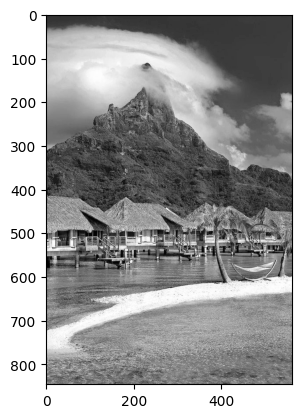

In [3]:
# Perform translation using NumPy
plt.imshow(img, cmap='gray')
plt.show()

<h4>Plot its histogram</h4>

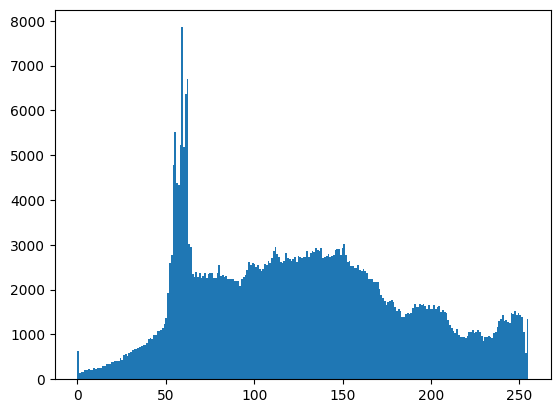

In [4]:
ax = plt.hist(img.ravel(), bins = 256)
plt.show()

<h4>Now, let's try it out with 10 bins,which is the default number for bins</h4>

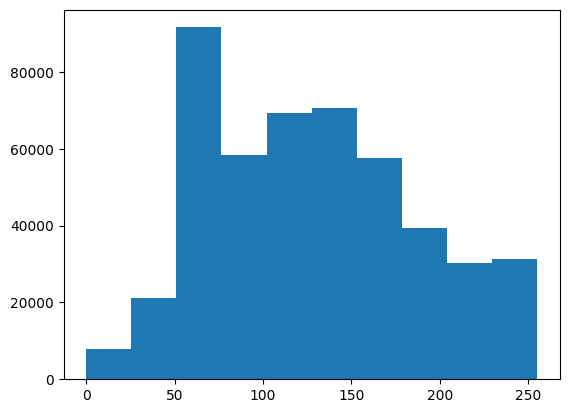

In [5]:
plt.hist(img.ravel())
plt.show()

<h3>Plot the three 2D histograms of the three channels</h3>

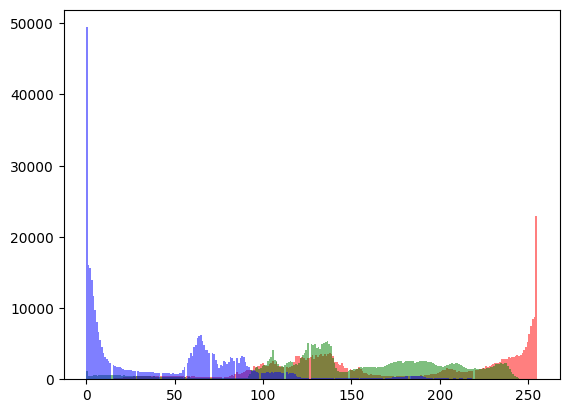

In [6]:
img= cv2.imread(dir + 'sunflower.jpg')
im=  img[:, :, 2]
plt.hist(im.ravel(), bins = 256, color = 'Red', \
         alpha = 0.5)

im=  img[:, :, 1]
plt.hist(im.ravel(), bins = 256, color = 'Green', \
         alpha = 0.5)

im=  img[:, :, 0]
plt.hist(im.ravel(), bins = 256, color = 'Blue', \
         alpha = 0.5)

plt.show()

<h3>Histograms with OpenCV</h3>
<p>The core strength of this method is that it allows you to find the histogram of your selected <b>region of interest (ROI)</b> in an image.</br>
The command used to compute the histogram of a particular channel of an image is as follows:</br>
<code> cv2.calcHist([images], [channels], mask, [histSize], \
             [ranges])   </code>
</p>

In [2]:
import cv2
import numpy as np

In [4]:
# Read the image:
dir = "The-Computer-Vision-Workshop/Chapter03/data/"
im = cv2.imread(dir + 'flowers.jpeg')

In [7]:
#     Prompt the user to draw a rectangular bounding box on the image to mark the ROI:
x,y,w,h = cv2.selectROI(im, fromCenter=0)
mymask= np.zeros(im.shape[:2],  dtype = "uint8")
mymask[int(y):int(y+h) , int(x):int(x+w)]= 255
cv2.imshow('Created mask', mymask)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('mask cherry.png' , mymask)

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


QObject::moveToThread: Current thread (0x5555587bd030) is not the object's thread (0x55555959b9a0).
Cannot move to target thread (0x5555587bd030)

QObject::moveToThread: Current thread (0x5555587bd030) is not the object's thread (0x55555959b9a0).
Cannot move to target thread (0x5555587bd030)

QObject::moveToThread: Current thread (0x5555587bd030) is not the object's thread (0x55555959b9a0).
Cannot move to target thread (0x5555587bd030)

QObject::moveToThread: Current thread (0x5555587bd030) is not the object's thread (0x55555959b9a0).
Cannot move to target thread (0x5555587bd030)

QObject::moveToThread: Current thread (0x5555587bd030) is not the object's thread (0x55555959b9a0).
Cannot move to target thread (0x5555587bd030)

QObject::moveToThread: Current thread (0x5555587bd030) is not the object's thread (0x55555959b9a0).
Cannot move to target thread (0x5555587bd030)

QObject::moveToThread: Current thread (0x5555587bd030) is not the object's thread (0x55555959b9a0).
Cannot move to tar

True

<h3>Histogram Equalization of a Grayscale Image</h3>

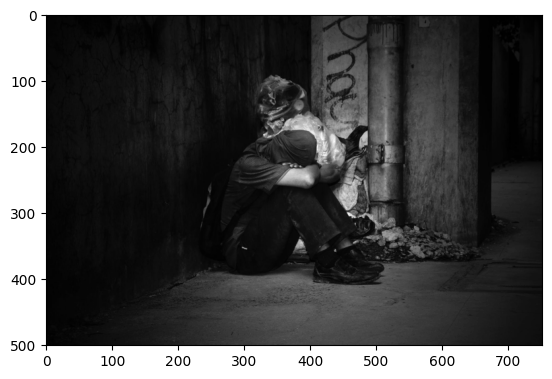

In [6]:
import cv2

dir = "The-Computer-Vision-Workshop/Chapter03/data/"
img= cv2.imread(dir+'dark_image1.png', 0) #Read the image as grayscale

plt.imshow(img, cmap='gray')
plt.show()
 
# # Display the image
# cv2.imshow('Original Image', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

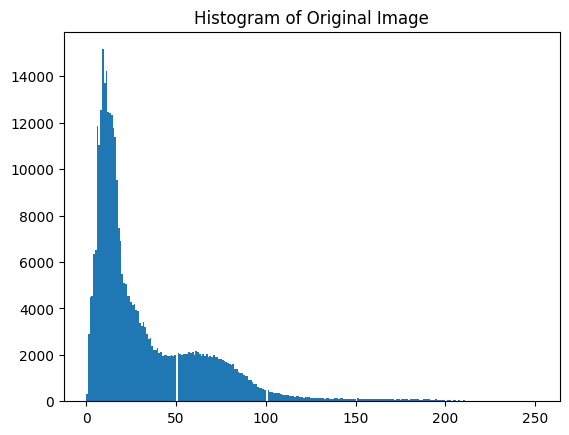

In [3]:
import matplotlib.pyplot as plt
# Draw the histogram of the original image with 256 bins

ax = plt.hist(img.ravel(), bins= 256)
plt.title('Histogram of Original Image')
plt.show()


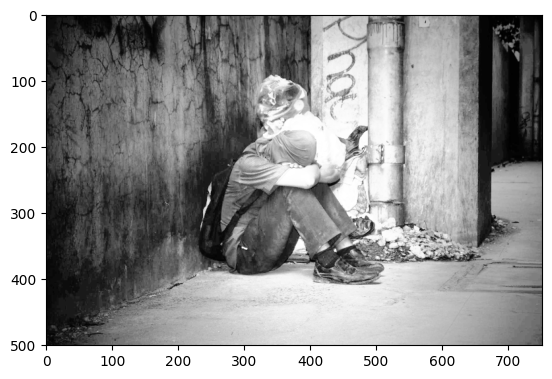

In [7]:
# Apply histogram equalization to the original image
histequ = cv2.equalizeHist(img)

plt.imshow(histequ, cmap='gray')
plt.show()

# cv2.imshow('Histogram Equalized Image', histequ)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

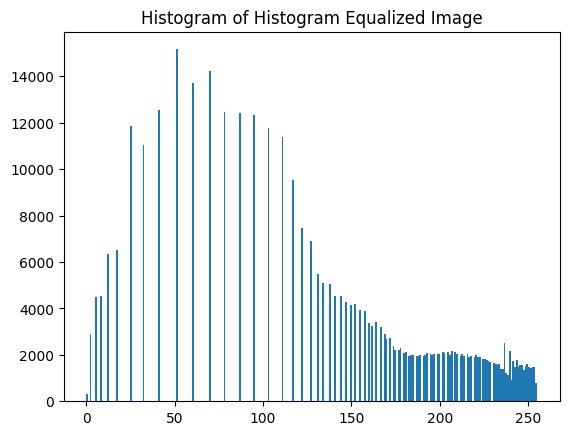

In [5]:
# Draw the histogram of the histogram equalized image with 256 bins
ax = plt.hist(histequ.ravel(), bins= 256)
plt.title('Histogram of Histogram Equalized Image')
plt.show()

<h3>Stack Images Side by Side</h3>
<p>To have a better view of the differences, let's make another image in which the original and histogram equalized images are stacked side by side.</p>

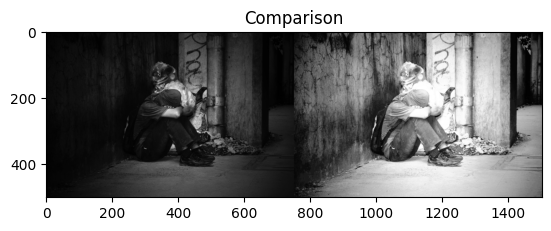

In [8]:
import numpy as np
img_with_histequ = np.hstack((img,histequ))

ax = plt.imshow(img_with_histequ, cmap='gray')
plt.title('Comparison')
plt.show()
# cv2.imshow('Comparison', img_with_histequ)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

<h3>Contrast Limited Adaptive Histogram Equalization (CLAHE)</h3>
<p><b>Contrast Limited Adaptive Histogram Equalization (CLAHE)</b>, although a simple algorithm, is a very powerful tool for retrieving hidden details from images without the over-amplification of noise. 
<ul>
<li>What it does is divide the entire image into small segments and equalize the histogram of each segment. </li>
<li>To make the image smooth, the visibility of the block regions is reduced by bilinear interpolation. </li>
</ul></p>
<p>To apply CLAHE to an image in Python using OpenCV, firstly, a CLAHE object needs to be created. The command for that is as follows:
</br>
<code>clahe = cv2.createCLAHE(clip_limit, block_size)</code></br>
<ul>
<li><code>clip_limit</code>: This tells the function how much of the histogram peak should be clipped off. If its value is 1, then no clipping is done. Usually, it is kept at 2 or 3. The higher the clip limit, the more the local contrast is amplified.</li>

<li><code>block_size</code>: This is the size of the blocks you want to divide the image into.</li>
</ul>
After your CLAHE object is created, you can use it to apply CLAHE on any grayscale image with the following command:
</br>
<code>img_out = clahe.apply(img_in)</code>
</p>


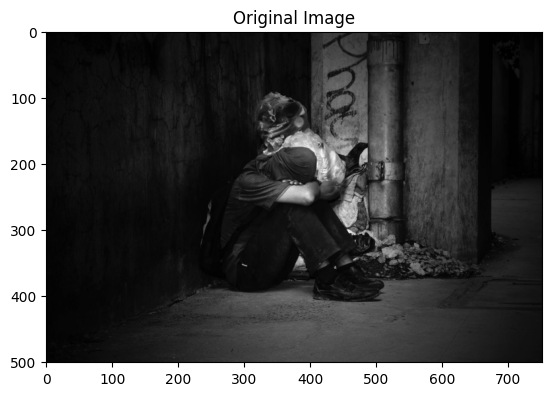

In [11]:
# Import the OpenCV library and read image
import cv2

dir = "The-Computer-Vision-Workshop/Chapter03/data/"
img= cv2.imread(dir + 'dark_image1.png', 0)

plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.show()
# cv2.imshow('Original Image', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

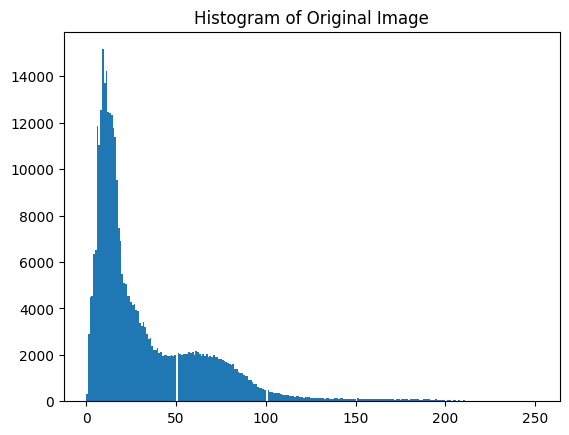

In [12]:
# Draw the histogram of the original image with 256 bins:
ax = plt.hist(img.ravel(), bins= 256)
plt.title('Histogram of Original Image')
plt.show()

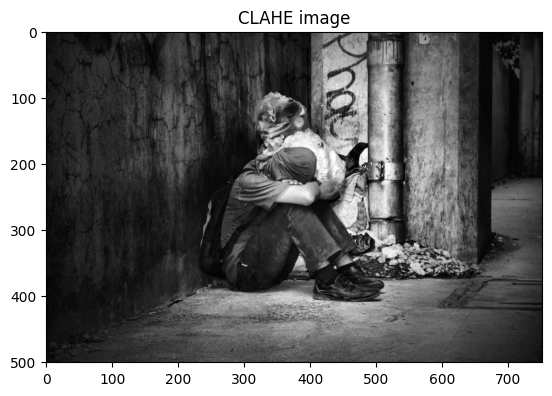

In [13]:
# Create a CLAHE object. Let's set the clip limit as 3 and the grid size as 8x8. 
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
out = clahe.apply(img)

plt.imshow(out, cmap='gray')
plt.title('CLAHE image')
plt.show()

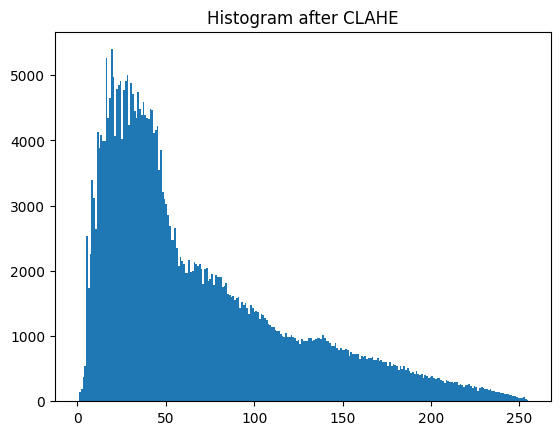

In [14]:
ax = plt.hist(out.ravel(), bins= 256)
plt.title('Histogram after CLAHE')
plt.show()

<h2>Enhancing Images Using Histogram Equalization and CLAHE</h2>

In [15]:
import cv2
import matplotlib.pyplot as plt

dir = "The-Computer-Vision-Workshop/Chapter03/data/"


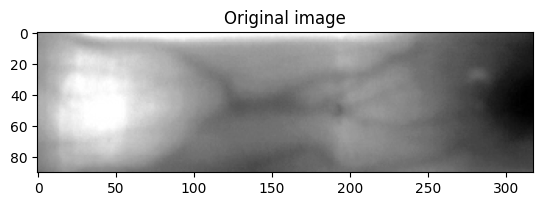

In [16]:
img= cv2.imread(dir + 'fingervein.bmp', 0)
imgplot = plt.imshow(img , cmap="gray")
plt.title('Original image')
plt.show()

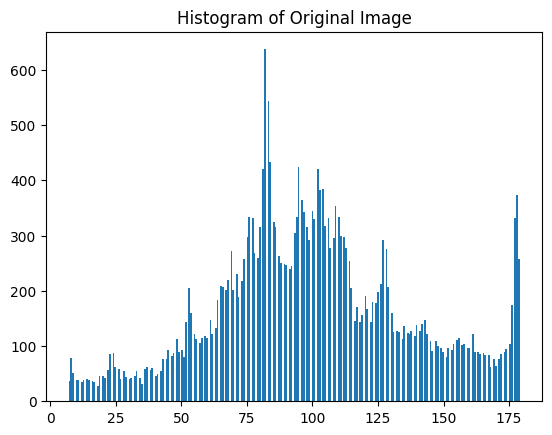

In [17]:
plt.hist(img.ravel(), bins= 256)
plt.title('Histogram of Original Image')
plt.show()

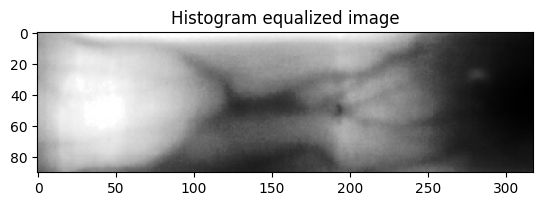

In [18]:
# Let's now perform histogram equalization. 
histequ = cv2.equalizeHist(img)
plt.imshow(histequ , cmap="gray")
plt.title('Histogram equalized image')
plt.show()

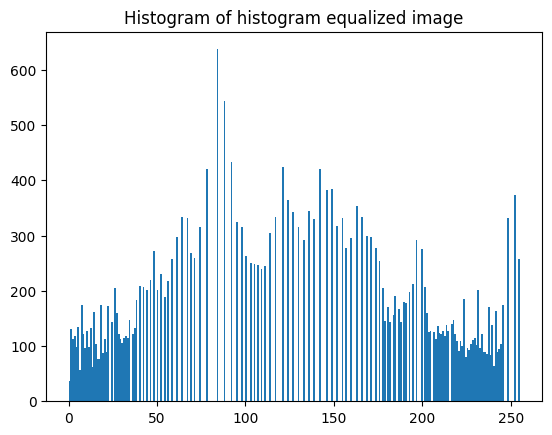

In [19]:
plt.hist(histequ.ravel(), bins= 256)
plt.title('Histogram of histogram equalized image')
plt.show()

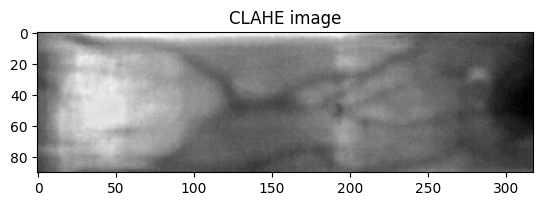

In [20]:
# Apply CLAHE 
clahe = cv2.createCLAHE(clipLimit=4.0, \
                        tileGridSize=(16,16))
clahe_img = clahe.apply(img)
plt.imshow(clahe_img , cmap="gray")
plt.title('CLAHE image')
plt.show()

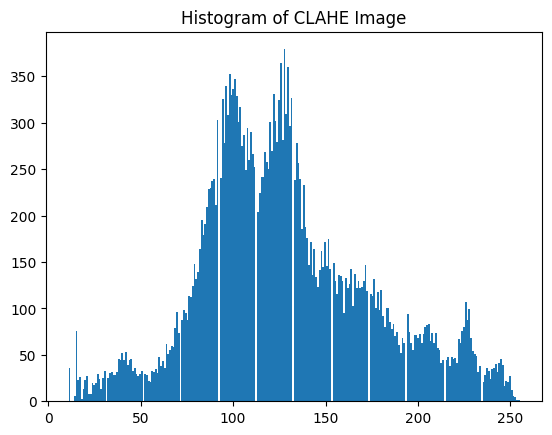

In [21]:
plt.hist(clahe_img.ravel(), bins= 256)
plt.title('Histogram of CLAHE Image')
plt.show()

<h2>Histogram Equalization in the BGR Color Space</h2>

In [22]:
import cv2
import matplotlib.pyplot as plt

dir = "The-Computer-Vision-Workshop/Chapter03/data/"


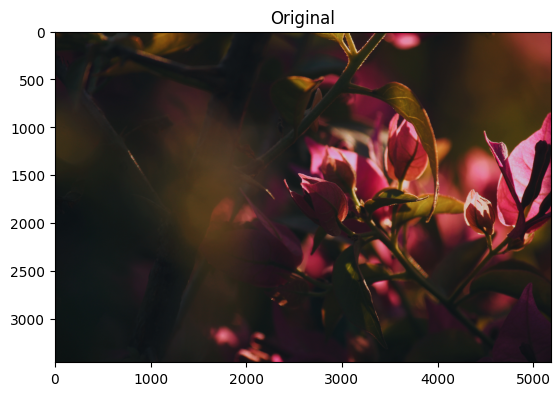

In [23]:
img = cv2.imread(dir + 'bloom.jpg')
origrgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB);
imgplot = plt.imshow(origrgb)
plt.title('Original')
plt.show()                 

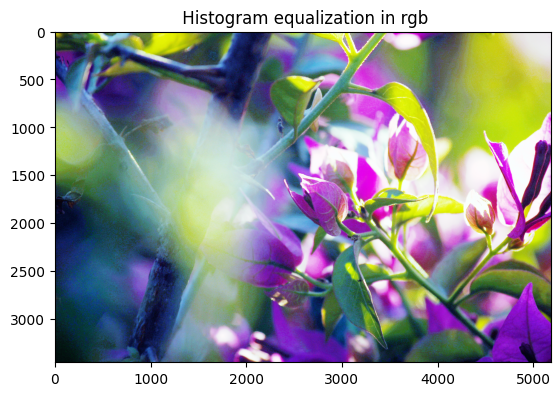

In [24]:
# Split the BGR image into three channels
b,g,r = cv2.split(img);

# Apply histogram equalization to each channel
b = cv2.equalizeHist(b);
g = cv2.equalizeHist(g);
r = cv2.equalizeHist(r);

# Merge the channels again
bgr = cv2.merge([b,g,r]);

# Convert the image to RGB for display using Matplotlib:
rgb = cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB);

# Display the enhanced image:
imgplot = plt.imshow(rgb)
plt.title(' Histogram equalization in rgb')
plt.show()


<h4>Repeate the Same Process with CLAHE</h4>

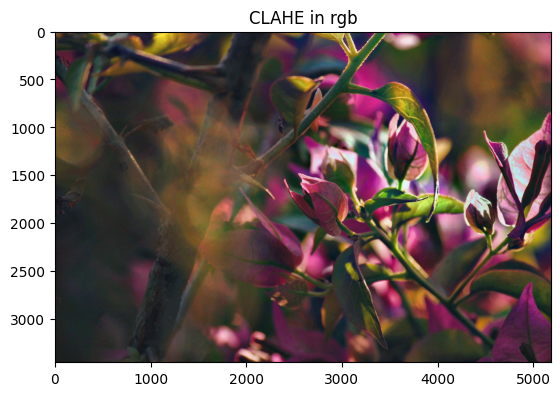

In [25]:
# split the original image into three channels again:
b,g,r = cv2.split(img);

# Create a CLAHE object and then apply it to each channel:
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(16,16))

b = clahe.apply(b)
g = clahe.apply(g)
r = clahe.apply(r)

# Merge the channels again:
bgr = cv2.merge([b,g,r]);

# Convert the image to RGB for display using Matplotlib:
rgb = cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB);

# Display the enhanced image:
imgplot = plt.imshow(rgb)
plt.title('CLAHE in rgb')
plt.show()


<h3>The Histogram Equalization of Color Images Using the HSV and LAB Color Spaces</h3>

<p>The steps for processing in the HSV space are as follows:
<ol>
<li>Convert the image from RGB/BGR to the HSV color space.</li>
<li>Split the image into the h, s, and v planes.</li>
<li>Equalize the histogram of the v plane.</li>
<li>Merge the h, s, and v planes back together.</li>
<li>Convert back to RGB/BGR.</ol></p>

<p>Now, here are the steps for processing in the LAB space:
<ol>
<li>Convert the image from RGB/BGR to the LAB color space.</li>
<li>Split the image into the l, a, and b planes.</li>
<li>Equalize the histogram of the l plane.</li>
<li>Merge the l, a, and b planes back together.</li>
<li>Convert back to RGB/BGR.</li>
</ol></p>

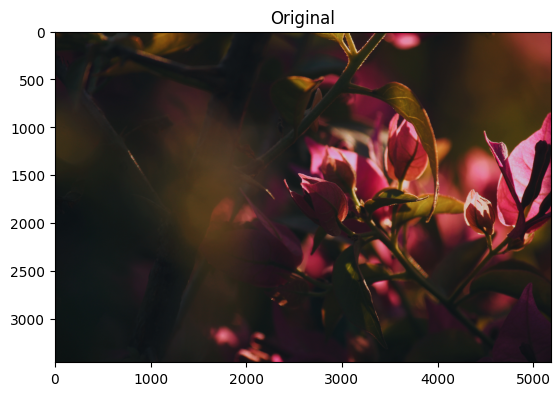

In [26]:
import cv2
import matplotlib.pyplot as plt

dir = "The-Computer-Vision-Workshop/Chapter03/data/"
img = cv2.imread(dir + 'bloom.jpg')

origrgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB);
imgplot = plt.imshow(origrgb)
plt.title('Original')
plt.show()

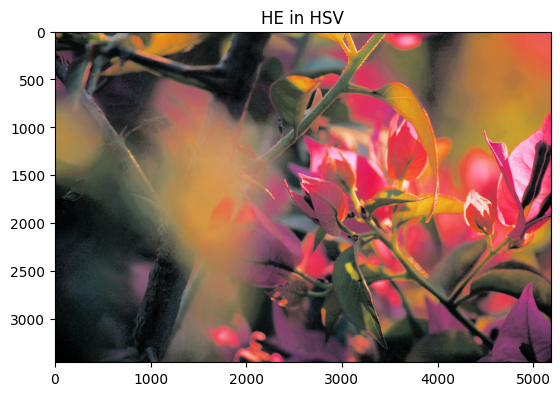

In [27]:
# Convert the image to the HSV space using the following code:
imgHSV = cv2.cvtColor(img,cv2.COLOR_BGR2HSV);

# Split the image into the h, s, and v planes as follows:
h,s,v = cv2.split(imgHSV);

# Apply histogram equalization to the v channel:
v = cv2.equalizeHist(v);

# Stack the three planes back together to get an updated HSV image:
hsv = cv2.merge([h,s,v]);

# Finally, transform it back to RGB so that it can be visualized:
rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB);

# Display the image in Matplotlib:
plt.imshow(rgb)
plt.title('HE in HSV')
plt.show()


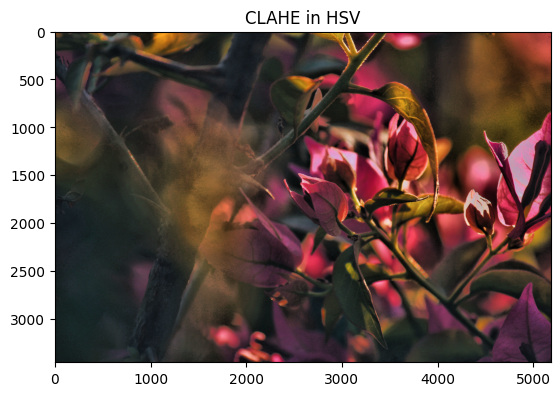

In [28]:
# To repeat the process with CLAHE, again split the image into the h, s, and v planes as follows:
h,s,v = cv2.split(imgHSV);

# Create a CLAHE object:
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(16,16))

# Apply CLAHE on the v channel:
v = clahe.apply(v)

# Stack the three planes back together to get an updated HSV image:
hsv = cv2.merge([h,s,v]);

# Finally, transform it back to RGB so that it can be visualized by Matplotlib:
rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB);

# Display the image with Matplotlib:
plt.imshow(rgb)
plt.title('CLAHE in HSV')
plt.show()


<h3> Histogram Equalization in the LAB Color Space</h3>

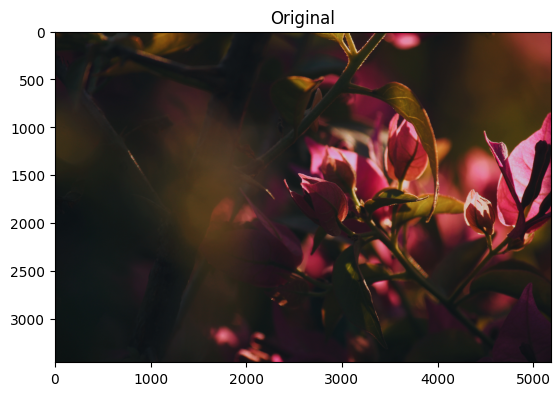

In [29]:
# Import OpenCV for image processing and Matplotlib for plotting:
import cv2
import matplotlib.pyplot as plt

# Read the image as follows:
dir = "The-Computer-Vision-Workshop/Chapter03/data/"
img = cv2.imread(dir + 'bloom.jpg')

# Convert the image from BGR to RGB and then display it with Matplotlib:
origrgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB);
imgplot = plt.imshow(origrgb)
plt.title('Original')
plt.show()

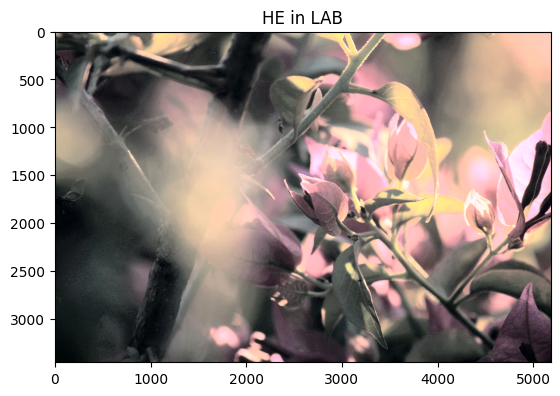

In [32]:
# Perform histogram equalization on the L channel (plane 0 of the LAB image):
imgLAB = cv2.cvtColor(img ,cv2.COLOR_BGR2LAB);
imgLAB[:,:,0]= cv2.equalizeHist(imgLAB[:,:,0])

# Transform it back to RGB so that it can be visualized using Matplotlib:
rgb = cv2.cvtColor(imgLAB,cv2.COLOR_LAB2RGB);

# Display the final image as follows:
plt.imshow(rgb)
plt.title('HE in LAB')
plt.show()


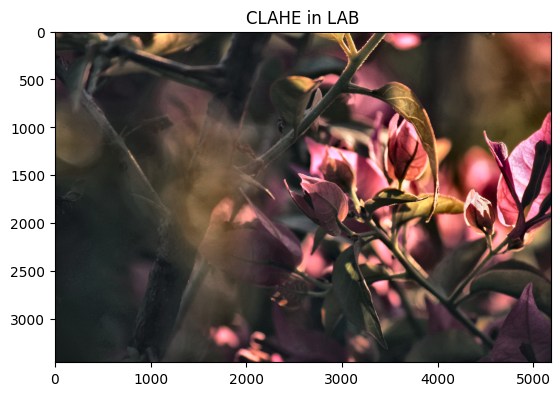

In [31]:
# To repeat the process with CLAHE, make a CLAHE object:
clahe = cv2.createCLAHE(clipLimit=4.0, \
    tileGridSize=(16,16))

# Apply CLAHE to the L channel (plane 0 of the original LAB image):
imgLAB = cv2.cvtColor(img,cv2.COLOR_BGR2LAB);
imgLAB[:,:,0] = clahe.apply(imgLAB[:,:,0])

# Transform it back to RGB so that it can be visualized using Matplotlib:
rgb = cv2.cvtColor(imgLAB,cv2.COLOR_LAB2RGB);

# Display the final image:
plt.imshow(rgb)
plt.title('CLAHE in LAB')
plt.show()


<h2>Image Enhancement in a User-Defined ROI</h2>

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

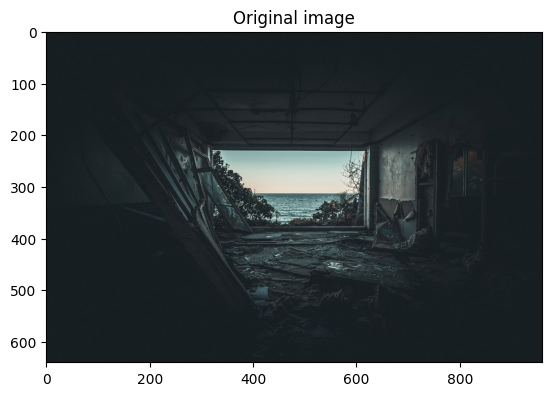

In [34]:
# Read the image provided to you and view it:
dir = "The-Computer-Vision-Workshop/Chapter03/data/"

im = cv2.imread(dir + 'ocean.jpg')
origrgb = cv2.cvtColor(im,cv2.COLOR_BGR2RGB);
imgplot = plt.imshow(origrgb)
plt.title('Original image')
plt.show()


In [35]:
# Prompt the user to draw a rectangular bounding box on the image to mark the ROI:

x,y,w,h = cv2.selectROI(im, fromCenter=0)
cv2.destroyAllWindows();


Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


QObject::moveToThread: Current thread (0x55555b435bb0) is not the object's thread (0x55555b79e900).
Cannot move to target thread (0x55555b435bb0)

QObject::moveToThread: Current thread (0x55555b435bb0) is not the object's thread (0x55555b79e900).
Cannot move to target thread (0x55555b435bb0)

QObject::moveToThread: Current thread (0x55555b435bb0) is not the object's thread (0x55555b79e900).
Cannot move to target thread (0x55555b435bb0)

QObject::moveToThread: Current thread (0x55555b435bb0) is not the object's thread (0x55555b79e900).
Cannot move to target thread (0x55555b435bb0)

QObject::moveToThread: Current thread (0x55555b435bb0) is not the object's thread (0x55555b79e900).
Cannot move to target thread (0x55555b435bb0)

QObject::moveToThread: Current thread (0x55555b435bb0) is not the object's thread (0x55555b79e900).
Cannot move to target thread (0x55555b435bb0)

QObject::moveToThread: Current thread (0x55555b435bb0) is not the object's thread (0x55555b79e900).
Cannot move to tar

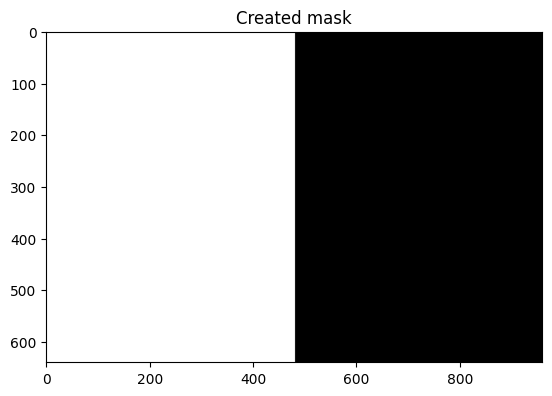

In [36]:
# Use numpy to create a totally blank image with all pixels being black (0)
mymask= np.zeros(im.shape[:2],  dtype = "uint8")

# Within the mask's ROI, make all the pixels white (255). This is now the mask image:
mymask[int(y):int(y+h) , int(x):int(x+w)]= 255

# Display the mask:
mask_rgb = cv2.cvtColor(mymask,cv2.COLOR_BGR2RGB);
imgplot = plt.imshow(mask_rgb)
plt.title('Created mask')
plt.show()


In [37]:
# Save the mask to a .png file:
cv2.imwrite('mask_image.png' , mymask)

True

Text(0.5, 1.0, 'V plane')

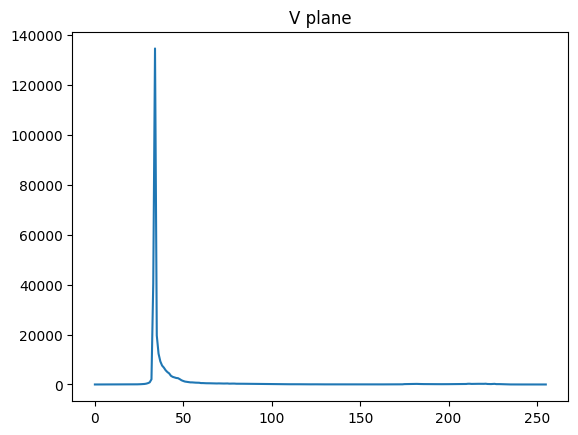

In [38]:
# Convert the image to the HSV space:
imgHSV = cv2.cvtColor(im,cv2.COLOR_BGR2HSV);

# Compute a histogram of the masked region in the V plane (channel 2):
hist = cv2.calcHist([imgHSV],[2],mymask,[256],[0,255])

# Plot this histogram:
plt.plot(hist)
plt.title('V plane')


Text(0.5, 1.0, 'enhanced V plane')

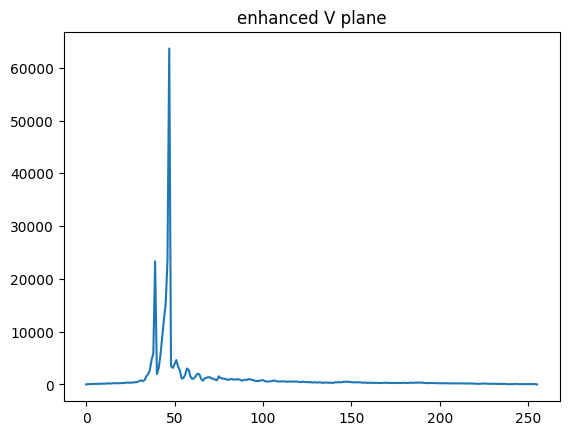

In [39]:
v= imgHSV[:,:,2]

# Create a CLAHE object:
clahe = cv2.createCLAHE(clipLimit=7.0, \
                    tileGridSize=(8,8))

# Access the area within the ROI of the V plane and apply CLAHE to it:
v[int(y):int(y+h) , \
int(x):int(x+w)]= clahe.apply(v[int(y):int(y+h) , \
                                int(x):int(x+w)])

# Compute the histogram of the area within the ROI of the modified V plane:
hist = cv2.calcHist([imgHSV],[2],mymask,[256],[0,255])

# Plot the histogram:
plt.plot(hist)
plt.title('enhanced V plane')


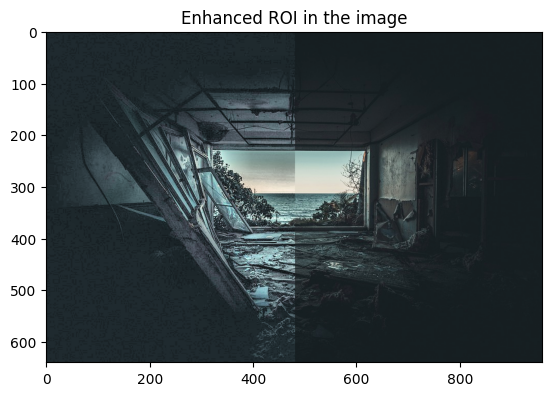

In [40]:
# Bring the image back to the RGB space and use Matplotlib to display it:

enhanced = cv2.cvtColor(imgHSV,cv2.COLOR_HSV2RGB);
imgplot = plt.imshow(enhanced)
plt.title('Enhanced ROI in the image')
plt.show() 
